# Analysis of different prepaid plans for budget allocation

The telecom operator company , Megaline offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.
Therefore ,  a preliminary analysis of the plans based on a relatively small client selection has to be done. The data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018 .. is provided. The clients' behavior needs to be analyzed to determine which prepaid plan brings in more revenue. 

### Goal: 
1. Create separate dataset for each plan users.  
2. Calculate the total revenue for each plan.  
3. Also table the customer behavior like monthly minutes used,gb used,messages sent..  
The above steps make it easier to proceed with analysing the data fields and test the hypothesis.  


### Test hypotheses:
    The average revenue from users of Ultimate and Surf calling plans differs.
    The average revenue from users in NY-NJ area is different from that of the users from other regions.

In [154]:
#Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st


In [155]:
file_list=[
           '/datasets/megaline_internet.csv',
           '/datasets/megaline_messages.csv',
           '/datasets/megaline_plans.csv',
           '/datasets/megaline_users.csv',
           '/datasets/megaline_calls.csv'
    
]


In [156]:
    #Read all the files   
    try: 
        internet_df=pd.read_csv(file_list[0])
        messages_df=pd.read_csv(file_list[1])
        plans_df=pd.read_csv(file_list[2])
        users_df=pd.read_csv(file_list[3])
        calls_df=pd.read_csv(file_list[4])
        
    except Exception as e:
        print ('Error in reading file')
        print (e)


**Having an initial overview of each dataset used**

In [157]:
internet_df.head(10)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


In [158]:
messages_df.head(10)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


In [159]:
plans_df.head(10)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [160]:
users_df.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


In [161]:
calls_df.head(10)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


### Processing data

In [162]:
#studying calls dataset
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [163]:
#call_date is converted to datetime format as it helps to easy calculation based on month
calls_df['call_date']=pd.to_datetime(calls_df['call_date'],format='%Y-%m-%d')

In [164]:
calls_df['month']=pd.DatetimeIndex(calls_df['call_date']).month

In [165]:
#each individual call is rounded up using np.ceil: even if the call lasted just one second, it will be counted as one minute.
calls_df['rounded_minutes']=calls_df['duration'].apply(np.ceil)

In [166]:
calls_df.head(10)

,id,user_id,call_date,duration,month,rounded_minutes
0,1000_93,1000,2018-12-27,8.52,12,9.0
1,1000_145,1000,2018-12-27,13.66,12,14.0
2,1000_247,1000,2018-12-27,14.48,12,15.0
3,1000_309,1000,2018-12-28,5.76,12,6.0
4,1000_380,1000,2018-12-30,4.22,12,5.0
5,1000_388,1000,2018-12-31,2.20,12,3.0
6,1000_510,1000,2018-12-27,5.75,12,6.0
7,1000_521,1000,2018-12-28,14.18,12,15.0
8,1000_530,1000,2018-12-28,5.77,12,6.0
9,1000_544,1000,2018-12-26,4.40,12,5.0


In [167]:
#studying internet dataset
internet_df['user_id'].value_counts()

1185    851
1028    752
1171    716
1498    657
1214    652
       ... 
1323      3
1034      2
1108      2
1452      1
1306      1
Name: user_id, Length: 489, dtype: int64

In [168]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [169]:
#session_date is converted to datetime format as it helps to easy calculation based on month
internet_df['session_date']=pd.to_datetime(internet_df['session_date'],format='%Y-%m-%d')
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [170]:
internet_df['month']=pd.DatetimeIndex(internet_df['session_date']).month

In [171]:
internet_df.head(10)

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12
5,1001_0,1001,2018-08-24,284.68,8
6,1001_3,1001,2018-12-09,656.04,12
7,1001_4,1001,2018-11-04,16.97,11
8,1001_10,1001,2018-11-27,135.18,11
9,1001_15,1001,2018-12-13,761.92,12


In [172]:
#studying users dataset
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


**Missing values in each dataset**

In [173]:
users_df.isna().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

**Missing values detected in 'churn_date' column of users_df.** 

In [174]:
#studying messages
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [175]:
#message_date is converted to datetime format as it helps to easy calculation based on month
messages_df['message_date']=pd.to_datetime(messages_df['message_date'],format='%Y-%m-%d')

In [176]:
messages_df['month']=pd.DatetimeIndex(messages_df['message_date']).month

In [177]:
messages_df.isna().sum()

id              0
user_id         0
message_date    0
month           0
dtype: int64

**No missing values observed in messages_df**

In [178]:
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   id               137735 non-null  object        
 1   user_id          137735 non-null  int64         
 2   call_date        137735 non-null  datetime64[ns]
 3   duration         137735 non-null  float64       
 4   month            137735 non-null  int64         
 5   rounded_minutes  137735 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 6.3+ MB


In [179]:
calls_df.isna().sum()

id                 0
user_id            0
call_date          0
duration           0
month              0
rounded_minutes    0
dtype: int64

**No missing values observed in calls_df**

In [180]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   month         104825 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 4.0+ MB


In [181]:
internet_df.isna().sum()

id              0
user_id         0
session_date    0
mb_used         0
month           0
dtype: int64

**No missing values observed in internet_df**

In [182]:
#Workng with missing values in users_df
users_df.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


In [183]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [184]:
#missing values in churn_date means plan is still in use.we created new column that takes boolean to make it easy
users_df['plan_in_use']=pd.isnull(users_df['churn_date'])

In [185]:
users_df[users_df['plan_in_use']==False].head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,plan_in_use
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,False
12,1012,Jonelle,Mcbride,59,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-06-28,surf,2018-11-16,False
22,1022,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07,False
40,1040,Paris,Santos,72,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-12-23,surf,2018-12-30,False
50,1050,Jone,Owen,23,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-03-20,ultimate,2018-10-07,False
54,1054,Denis,Frost,50,"Phoenix-Mesa-Chandler, AZ MSA",2018-04-21,surf,2018-12-31,False
67,1067,Robt,Allen,37,"Grand Rapids-Kentwood, MI MSA",2018-09-24,surf,2018-11-24,False
83,1083,Lyndia,Acevedo,65,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-10-26,surf,2018-12-18,False
84,1084,Wiley,Mckinney,21,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-06-04,surf,2018-11-11,False
94,1094,Walter,Petersen,54,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-10-30,surf,2018-12-12,False


In [186]:
users_df.tail(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,plan_in_use
490,1490,Shane,Cortez,42,"Sacramento–Roseville–Folsom, CA MSA",2018-01-20,ultimate,NaN,True
491,1491,Terina,Jensen,22,"Grand Rapids-Kentwood, MI MSA",2018-04-27,surf,2018-09-18,False
492,1492,Elvie,Jones,63,"Portland-Vancouver-Hillsboro, OR-WA MSA",2018-03-07,surf,NaN,True
493,1493,Cicely,Wynn,18,"Boston-Cambridge-Newton, MA-NH MSA",2018-03-06,ultimate,NaN,True
494,1494,Preston,Downs,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-19,surf,NaN,True
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN,True
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN,True
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN,True
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN,True
499,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,True


In [187]:
#reg_date is converted to datetime format as it helps to easy calculation based on month
users_df['reg_date']=pd.to_datetime(users_df['reg_date'],format='%Y-%m-%d')

In [188]:
#'churn_date' with dates (subscription cancelled) are less than 10%(around 7%).Also we see some inconsistency with monthly data.
#Since their percent is less,we just have them without any processing.
users_df['churn_date'].value_counts().count()

29

In [189]:
#replacing missing items with na as they cannot have any dates(still in use)
users_df['churn_date']=users_df['churn_date'].fillna('na')

In [190]:
users_df.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,plan_in_use
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,na,True
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,na,True
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,na,True
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,na,True
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,na,True
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,na,True
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,False
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,na,True
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,na,True
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,na,True


In [191]:
users_df['churn_date'].isna().sum()

0

In [192]:
#working with internet dataset
internet_df['mb_used'].value_counts()

0.00      13747
414.46        8
435.77        8
423.06        7
313.79        7
          ...  
301.21        1
108.62        1
608.63        1
212.02        1
677.66        1
Name: mb_used, Length: 57624, dtype: int64

In [193]:
#We observe nearly 13747 rows with value 0
internet_df[internet_df['mb_used']==0.00].head(10)

,id,user_id,session_date,mb_used,month
1,1000_204,1000,2018-12-31,0.0,12
14,1001_26,1001,2018-09-17,0.0,9
16,1001_28,1001,2018-10-17,0.0,10
34,1001_54,1001,2018-09-02,0.0,9
43,1001_77,1001,2018-10-31,0.0,10
44,1001_80,1001,2018-12-24,0.0,12
46,1001_84,1001,2018-10-13,0.0,10
54,1001_94,1001,2018-12-03,0.0,12
58,1001_103,1001,2018-12-10,0.0,12
64,1001_124,1001,2018-09-28,0.0,9


In [194]:
#when checking total number of rows in the dataset 
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   month         104825 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 4.0+ MB


In [195]:
#rows with 'mb_used' 0.0 will have less impact as the data is day wise.There can be days without using much internet.
internet_df[(internet_df['user_id']==1001) & (internet_df['month']==9) ].sort_values('session_date').head(15)

,id,user_id,session_date,mb_used,month
246,1001_470,1001,2018-09-01,388.14,9
80,1001_148,1001,2018-09-01,298.57,9
34,1001_54,1001,2018-09-02,0.00,9
241,1001_460,1001,2018-09-04,0.00,9
234,1001_445,1001,2018-09-04,42.34,9
11,1001_17,1001,2018-09-05,727.29,9
12,1001_24,1001,2018-09-05,622.03,9
79,1001_147,1001,2018-09-06,0.00,9
40,1001_71,1001,2018-09-06,310.16,9
53,1001_93,1001,2018-09-06,240.13,9


In [196]:
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   id               137735 non-null  object        
 1   user_id          137735 non-null  int64         
 2   call_date        137735 non-null  datetime64[ns]
 3   duration         137735 non-null  float64       
 4   month            137735 non-null  int64         
 5   rounded_minutes  137735 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 6.3+ MB


In [197]:
#handling call duration with 0.0
calls_df['duration'].value_counts()

0.00     26834
8.37       102
4.02       102
3.91       101
7.61       100
         ...  
32.53        1
24.74        1
29.31        1
29.30        1
23.29        1
Name: duration, Length: 2802, dtype: int64

In [198]:
#Though calls  with 0 call duration seems to be more ,it has less impact as we take monthly data for analysis
calls_df[(calls_df['duration'] != 0.00) & (calls_df['user_id'] == 1001)].sort_values('call_date')

,id,user_id,call_date,duration,month,rounded_minutes
100,1001_167,1001,2018-08-14,10.19,8,11.0
212,1001_387,1001,2018-08-14,3.67,8,4.0
276,1001_512,1001,2018-08-16,10.82,8,11.0
143,1001_245,1001,2018-08-16,8.11,8,9.0
162,1001_284,1001,2018-08-16,4.53,8,5.0
...,...,...,...,...,...,...
193,1001_345,1001,2018-12-29,1.70,12,2.0
226,1001_414,1001,2018-12-30,5.52,12,6.0
224,1001_412,1001,2018-12-30,12.49,12,13.0
106,1001_179,1001,2018-12-31,14.44,12,15.0


duration values with 0.00 can be ignored as it is considered for monthly and not on day-to-day basis.

### Intermediate Conclusions:
So far ,we analysed all the  available datasets .   
1.users_df  
    This table gives the details about each user,his is,address ,the plan he uses,plan details..  
2.calls_df  
    This table gives the call details like calls made,duration ,call date...
3.internet_df  
    The details of internet usage like the date and mb used are tabeled in this dataset.
4.messages_df
    This has the details about text messages like count of messages,date..  
5.plans_df  
    This details the plans used..Since we have 2 plans,this table has 2 rows detailing each plan..  
    
We looked for missing values in each dataset and also any inappropriate data .
'churn_date' in users_df is the only column with missing values..Since the missing value represents   
'plan still in use ' state , we don't worry much about it.We just replaced with 'na' for more readablity.  

All the dates in each dataset are converted from object to datetime type as we are going to work with  
each of the datasets based on the monthly details..  

Our next step is to get the necessary data from each dataset based on the requirement (month wise 'minutes_used','gb_used','messages','total_revenue')and to calculate extra  
charges from them and then compare the revenue between users of the plans.

In [199]:
#monthly call details for each user id.
calls_df_pivot=calls_df.pivot_table(index=['user_id','month'],values='rounded_minutes',aggfunc=('count','sum'))

In [200]:
calls_df_pivot= calls_df_pivot.rename(columns={
    'count':'number_of_calls',
    'sum':'minutes_used'
})

In [201]:
calls_df_pivot=calls_df_pivot.reset_index()

In [202]:
calls_df_pivot.sort_values(['user_id','month'])

,user_id,month,number_of_calls,minutes_used
0,1000,12,16,124.0
1,1001,8,27,182.0
2,1001,9,49,315.0
3,1001,10,65,393.0
4,1001,11,64,426.0
...,...,...,...,...
2253,1498,12,39,339.0
2254,1499,9,41,346.0
2255,1499,10,53,385.0
2256,1499,11,45,308.0


In [203]:
messages_df.head(10)

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12
5,1000_346,1000,2018-12-29,12
6,1000_386,1000,2018-12-30,12
7,1000_413,1000,2018-12-31,12
8,1000_502,1000,2018-12-27,12
9,1000_525,1000,2018-12-28,12


In [204]:
#monthly message details for each user id.
messages_df_pivot=messages_df.pivot_table(index=['user_id','month'],values='id',aggfunc='count')

In [205]:
messages_df_pivot.head(10)

id
user_id month    
1000    12     11
1001    8      30
        9      44
        10     53
        11     36
        12     44
1002    10     15
        11     32
        12     41
1003    12     50

In [206]:
messages_df_pivot= messages_df_pivot.rename(columns={
    'id':'number_of_messages',
   
})

In [207]:
messages_df_pivot

number_of_messages
user_id month                    
1000    12                     11
1001    8                      30
        9                      44
        10                     53
        11                     36
...                           ...
1496    9                      21
        10                     18
        11                     13
        12                     11
1497    12                     50

[1806 rows x 1 columns]

In [208]:
messages_df_pivot=messages_df_pivot.reset_index()

In [209]:
messages_df_pivot

,user_id,month,number_of_messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [210]:
#monthly mb_used for each user id
internet_df_pivot=internet_df.pivot_table(index=['user_id','month'],values='mb_used',aggfunc='sum')

In [211]:
internet_df_pivot

mb_used
user_id month          
1000    12      1901.47
1001    8       6919.15
        9      13314.82
        10     22330.49
        11     18504.30
...                 ...
1498    12     23137.69
1499    9      12984.76
        10     19492.43
        11     16813.83
        12     22059.21

[2277 rows x 1 columns]

In [212]:
internet_df_pivot=internet_df_pivot.reset_index()

In [213]:
internet_df_pivot

,user_id,month,mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,16813.83


In [214]:
#As per the requirement : the total for the month is rounded up. If someone uses 1025 megabytes this month, they
# will be charged for 2 gigabytes.
#Creating new column 'gb-used'
internet_df_pivot['gb_used']=(internet_df_pivot['mb_used']/1024).apply(np.ceil)

In [215]:
internet_df_pivot

,user_id,month,mb_used,gb_used
0,1000,12,1901.47,2.0
1,1001,8,6919.15,7.0
2,1001,9,13314.82,14.0
3,1001,10,22330.49,22.0
4,1001,11,18504.30,19.0
...,...,...,...,...
2272,1498,12,23137.69,23.0
2273,1499,9,12984.76,13.0
2274,1499,10,19492.43,20.0
2275,1499,11,16813.83,17.0


In [216]:
#new dataframe to store monthly messages,calls and internet details for easy analysis
user_final_df=pd.DataFrame()

In [217]:
#Call details and internet details are merged for each user
user_final_df=calls_df_pivot.merge(internet_df_pivot,on=['user_id','month'],how='outer')

In [218]:
user_final_df

,user_id,month,number_of_calls,minutes_used,mb_used,gb_used
0,1000,12,16.0,124.0,1901.47,2.0
1,1001,8,27.0,182.0,6919.15,7.0
2,1001,9,49.0,315.0,13314.82,14.0
3,1001,10,65.0,393.0,22330.49,22.0
4,1001,11,64.0,426.0,18504.30,19.0
...,...,...,...,...,...,...
2287,1311,6,NaN,NaN,1498.83,2.0
2288,1349,10,NaN,NaN,13093.55,13.0
2289,1349,11,NaN,NaN,17128.26,17.0
2290,1349,12,NaN,NaN,13039.91,13.0


In [219]:
#message details are merged along with calls and internet details
user_final_df=user_final_df.merge(messages_df_pivot,on=['user_id','month'],how='outer')

In [220]:
user_final_df

,user_id,month,number_of_calls,minutes_used,mb_used,gb_used,number_of_messages
0,1000,12,16.0,124.0,1901.47,2.0,11.0
1,1001,8,27.0,182.0,6919.15,7.0,30.0
2,1001,9,49.0,315.0,13314.82,14.0,44.0
3,1001,10,65.0,393.0,22330.49,22.0,53.0
4,1001,11,64.0,426.0,18504.30,19.0,36.0
...,...,...,...,...,...,...,...
2288,1349,10,NaN,NaN,13093.55,13.0,76.0
2289,1349,11,NaN,NaN,17128.26,17.0,72.0
2290,1349,12,NaN,NaN,13039.91,13.0,61.0
2291,1361,5,NaN,NaN,1519.69,2.0,2.0


In [221]:
#filling missed value as they don't have any value literally.(0)
user_final_df=user_final_df.fillna(0)

In [222]:
user_final_df

,user_id,month,number_of_calls,minutes_used,mb_used,gb_used,number_of_messages
0,1000,12,16.0,124.0,1901.47,2.0,11.0
1,1001,8,27.0,182.0,6919.15,7.0,30.0
2,1001,9,49.0,315.0,13314.82,14.0,44.0
3,1001,10,65.0,393.0,22330.49,22.0,53.0
4,1001,11,64.0,426.0,18504.30,19.0,36.0
...,...,...,...,...,...,...,...
2288,1349,10,0.0,0.0,13093.55,13.0,76.0
2289,1349,11,0.0,0.0,17128.26,17.0,72.0
2290,1349,12,0.0,0.0,13039.91,13.0,61.0
2291,1361,5,0.0,0.0,1519.69,2.0,2.0


In [223]:
#checking number of records with call minutes being 0.
#we see that such records are very few in numbers
user_final_df[(user_final_df['number_of_calls']==0.0) & (user_final_df['minutes_used']==0.0)].count()

user_id               35
month                 35
number_of_calls       35
minutes_used          35
mb_used               35
gb_used               35
number_of_messages    35
dtype: int64

In [224]:
#Our new dataset with all the necessary data fields (number_of_messages,gb_used,minutes_used)for our analysis
user_final_df.head(15)

,user_id,month,number_of_calls,minutes_used,mb_used,gb_used,number_of_messages
0,1000,12,16.0,124.0,1901.47,2.0,11.0
1,1001,8,27.0,182.0,6919.15,7.0,30.0
2,1001,9,49.0,315.0,13314.82,14.0,44.0
3,1001,10,65.0,393.0,22330.49,22.0,53.0
4,1001,11,64.0,426.0,18504.30,19.0,36.0
5,1001,12,56.0,412.0,19369.18,19.0,44.0
6,1002,10,11.0,59.0,6552.01,7.0,15.0
7,1002,11,55.0,386.0,19345.08,19.0,32.0
8,1002,12,47.0,384.0,14396.24,15.0,41.0
9,1003,12,149.0,1104.0,27044.14,27.0,50.0


In [225]:
users_df.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,plan_in_use
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,na,True
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,na,True
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,na,True
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,na,True
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,na,True
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,na,True
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,False
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,na,True
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,na,True
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,na,True


In [226]:
#We remove the unwanted columns for the final reference table for easy understanding
user_final_df=user_final_df.drop(['number_of_calls'],axis=1)

In [227]:
user_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             2293 non-null   int64  
 1   month               2293 non-null   int64  
 2   minutes_used        2293 non-null   float64
 3   mb_used             2293 non-null   float64
 4   gb_used             2293 non-null   float64
 5   number_of_messages  2293 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 125.4 KB


In [228]:
user_final_df

,user_id,month,minutes_used,mb_used,gb_used,number_of_messages
0,1000,12,124.0,1901.47,2.0,11.0
1,1001,8,182.0,6919.15,7.0,30.0
2,1001,9,315.0,13314.82,14.0,44.0
3,1001,10,393.0,22330.49,22.0,53.0
4,1001,11,426.0,18504.30,19.0,36.0
...,...,...,...,...,...,...
2288,1349,10,0.0,13093.55,13.0,76.0
2289,1349,11,0.0,17128.26,17.0,72.0
2290,1349,12,0.0,13039.91,13.0,61.0
2291,1361,5,0.0,1519.69,2.0,2.0


### Working with each plan , and calculating extra charges for each user .

In [229]:
#creating a buffer dataset with 'user_id' and 'plan' fields mainly to merge plan details to our 'user_final_df' dataset
users_plan=users_df[['user_id','plan']]

In [230]:
users_plan.head(10)

,user_id,plan
0,1000,ultimate
1,1001,surf
2,1002,surf
3,1003,surf
4,1004,surf
5,1005,surf
6,1006,ultimate
7,1007,surf
8,1008,ultimate
9,1009,surf


In [231]:
user_final_df['user_id'].value_counts()

1077    12
1042    12
1185    12
1362    12
1196    12
        ..
1221     1
1262     1
1266     1
1207     1
1000     1
Name: user_id, Length: 490, dtype: int64

In [232]:
#getting new column for plan in our user_final_df by merging with 'users_plan' dataset
user_final_df=user_final_df.merge(users_plan,on='user_id')

###  Defining functions to calculate extra minutes,gb_used and messages_sent to calculate the extra_charges for each user..

In [233]:
#function to calculate extra minutes
def get_extra_minutes(row):
    
    used_minutes=row['minutes_used']
    plan_name =row['plan']
    extra_minutes=0
    if (plan_name == 'surf'):
        extra_minutes=used_minutes - int(plans_df.query('plan_name == "surf"').minutes_included)
    else:
        extra_minutes=used_minutes - int(plans_df.query('plan_name != "surf"').minutes_included)
    if (extra_minutes < 0 ):
        extra_minutes = 0
    return extra_minutes
        

In [234]:

user_final_df['extra_minutes']=user_final_df.apply(get_extra_minutes,axis=1).astype(int)

In [235]:
#function to calculate extra gb
def get_extra_gb(row):
    used_mb=row['mb_used']
    plan_name=row['plan']
    extra_mb=0
    if (plan_name == 'surf'):
        extra_gb=(used_mb - int(plans_df.query('plan_name == "surf"').mb_per_month_included))/1024
    else:
        extra_gb=(used_mb - int(plans_df.query('plan_name != "surf"').mb_per_month_included))/1024
    if (extra_gb < 0 ):
        extra_gb = 0
    return extra_gb
    
    
    

In [236]:
user_final_df['extra_gb']=user_final_df.apply(get_extra_gb,axis=1).astype(int)

In [237]:
user_final_df

,user_id,month,minutes_used,mb_used,gb_used,number_of_messages,plan,extra_minutes,extra_gb
0,1000,12,124.0,1901.47,2.0,11.0,ultimate,0,0
1,1001,8,182.0,6919.15,7.0,30.0,surf,0,0
2,1001,9,315.0,13314.82,14.0,44.0,surf,0,0
3,1001,10,393.0,22330.49,22.0,53.0,surf,0,6
4,1001,11,426.0,18504.30,19.0,36.0,surf,0,3
...,...,...,...,...,...,...,...,...,...
2288,1204,11,0.0,21346.95,21.0,42.0,ultimate,0,0
2289,1204,12,0.0,36730.05,36.0,78.0,ultimate,0,5
2290,1349,10,0.0,13093.55,13.0,76.0,surf,0,0
2291,1349,11,0.0,17128.26,17.0,72.0,surf,0,1


In [238]:
#function to calculate extra messages 
def get_extra_messages(row):
    used_messages=row['number_of_messages']
    plan_name=row['plan']
    extra_gb=0
    if (plan_name == 'surf'):
        extra_messages=used_messages - int(plans_df.query('plan_name == "surf"').messages_included)
    else:
        extra_messages=used_messages - int(plans_df.query('plan_name != "surf"').messages_included)
    if (extra_messages < 0 ):
        extra_messages = 0
    return extra_messages
    

In [239]:
user_final_df['extra_messages']=user_final_df.apply(get_extra_messages,axis=1).astype(int)

In [240]:
user_final_df

,user_id,month,minutes_used,mb_used,gb_used,number_of_messages,plan,extra_minutes,extra_gb,extra_messages
0,1000,12,124.0,1901.47,2.0,11.0,ultimate,0,0,0
1,1001,8,182.0,6919.15,7.0,30.0,surf,0,0,0
2,1001,9,315.0,13314.82,14.0,44.0,surf,0,0,0
3,1001,10,393.0,22330.49,22.0,53.0,surf,0,6,3
4,1001,11,426.0,18504.30,19.0,36.0,surf,0,3,0
...,...,...,...,...,...,...,...,...,...,...
2288,1204,11,0.0,21346.95,21.0,42.0,ultimate,0,0,0
2289,1204,12,0.0,36730.05,36.0,78.0,ultimate,0,5,0
2290,1349,10,0.0,13093.55,13.0,76.0,surf,0,0,26
2291,1349,11,0.0,17128.26,17.0,72.0,surf,0,1,22


In [241]:
#function to calculate extra charges incurred by each user and  'total revenue' (that includes monthly charge)from each user
def get_extra_charges(row):
    extra_minutes=row['extra_minutes']
    extra_gb=row['extra_gb']
    extra_messages=row['extra_messages']
    plan_name=row['plan']
    extra_charges =0
    extra_minutes_charge=0
    extra_gb_charge=0
    extra_messages_charge=0
    monthly_charge=0
    total_revenue=0
    if (plan_name == 'surf'):
        monthly_charge=int(plans_df.query('plan_name == "surf"').usd_monthly_pay)
        if(extra_minutes > 0):
            extra_minutes_charge=int(plans_df.query('plan_name == "surf"').usd_per_minute )* extra_minutes
        if(extra_gb > 0):
            extra_gb_charge = int(plans_df.query('plan_name == "surf"').usd_per_gb )* extra_gb
        if(extra_messages > 0):
            extra_messages_charge = int(plans_df.query('plan_name == "surf"').usd_per_message) * extra_messages
        total_charge=extra_minutes_charge+extra_gb_charge+extra_messages_charge
        total_revenue = total_charge+monthly_charge
    
    else:
        monthly_charge=int(plans_df.query('plan_name != "surf"').usd_monthly_pay)
        if(extra_minutes > 0):
            extra_minutes_charge=int(plans_df.query('plan_name != "surf"').usd_per_minute) * extra_minutes
        if(extra_gb > 0):
            extra_gb_charge = int(plans_df.query('plan_name != "surf"').usd_per_gb) * extra_gb
        if(extra_messages > 0):
            extra_messages_charge = int(plans_df.query('plan_name != "surf"').usd_per_message) * extra_messages
        total_charge=extra_minutes_charge+extra_gb_charge+extra_messages_charge
        total_revenue = total_charge+monthly_charge
           
    return total_charge , total_revenue

In [242]:
#adding 2 new columns to store the calculated 'extra charge' and 'total revenue'
user_final_df[['extra_charges','total_revenue']]=user_final_df.apply(get_extra_charges,axis=1,result_type ='expand')

In [243]:
user_final_df

,user_id,month,minutes_used,mb_used,gb_used,number_of_messages,plan,extra_minutes,extra_gb,extra_messages,extra_charges,total_revenue
0,1000,12,124.0,1901.47,2.0,11.0,ultimate,0,0,0,0,70
1,1001,8,182.0,6919.15,7.0,30.0,surf,0,0,0,0,20
2,1001,9,315.0,13314.82,14.0,44.0,surf,0,0,0,0,20
3,1001,10,393.0,22330.49,22.0,53.0,surf,0,6,3,60,80
4,1001,11,426.0,18504.30,19.0,36.0,surf,0,3,0,30,50
...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1204,11,0.0,21346.95,21.0,42.0,ultimate,0,0,0,0,70
2289,1204,12,0.0,36730.05,36.0,78.0,ultimate,0,5,0,35,105
2290,1349,10,0.0,13093.55,13.0,76.0,surf,0,0,26,0,20
2291,1349,11,0.0,17128.26,17.0,72.0,surf,0,1,22,10,30


In [244]:
user_final_df['extra_charges'].value_counts().head(10)

0     1425
20     114
10     112
50      94
30      85
40      80
60      59
80      51
70      50
90      41
Name: extra_charges, dtype: int64

In [245]:
user_final_df[user_final_df['extra_charges']>0].head(10)

,user_id,month,minutes_used,mb_used,gb_used,number_of_messages,plan,extra_minutes,extra_gb,extra_messages,extra_charges,total_revenue
3,1001,10,393.0,22330.49,22.0,53.0,surf,0,6,3,60,80
4,1001,11,426.0,18504.30,19.0,36.0,surf,0,3,0,30,50
5,1001,12,412.0,19369.18,19.0,44.0,surf,0,3,0,30,50
7,1002,11,386.0,19345.08,19.0,32.0,surf,0,3,0,30,50
9,1003,12,1104.0,27044.14,27.0,50.0,surf,604,11,0,110,130
11,1004,6,275.0,20672.82,21.0,18.0,surf,0,5,0,50,70
12,1004,7,381.0,24516.62,24.0,26.0,surf,0,8,0,80,100
13,1004,8,354.0,27981.74,28.0,25.0,surf,0,12,0,120,140
14,1004,9,301.0,18852.72,19.0,21.0,surf,0,3,0,30,50
16,1004,11,476.0,21850.78,22.0,25.0,surf,0,6,0,60,80


In [246]:
user_final_df[user_final_df['extra_charges']>0]['user_id'].value_counts().head(10)

1359    11
1498    10
1171    10
1268    10
1251     9
1120     9
1028     9
1066     9
1138     9
1406     8
Name: user_id, dtype: int64

In [247]:
user_final_df[user_final_df['total_revenue']>0]['user_id'].value_counts().head(10)

1077    12
1042    12
1185    12
1362    12
1196    12
1214    12
1408    11
1261    11
1028    11
1498    11
Name: user_id, dtype: int64

In [248]:
user_final_df[(user_final_df['extra_charges']>0) & (user_final_df['plan']=='surf')]['user_id'].value_counts().head(10)

1359    11
1268    10
1171    10
1498    10
1138     9
1251     9
1066     9
1120     9
1261     8
1277     8
Name: user_id, dtype: int64

In [249]:
#creating separate dataset for ultimate plan users
user_ultimate_df=user_final_df[user_final_df['plan']=='ultimate']

In [250]:
user_ultimate_df.head(10)

,user_id,month,minutes_used,mb_used,gb_used,number_of_messages,plan,extra_minutes,extra_gb,extra_messages,extra_charges,total_revenue
0,1000,12,124.0,1901.47,2.0,11.0,ultimate,0,0,0,0,70
19,1006,11,10.0,2068.37,3.0,15.0,ultimate,0,0,0,0,70
20,1006,12,59.0,32118.82,32.0,139.0,ultimate,0,1,0,7,77
26,1008,10,476.0,17106.99,17.0,21.0,ultimate,0,0,0,0,70
27,1008,11,446.0,23676.72,24.0,37.0,ultimate,0,0,0,0,70
28,1008,12,634.0,14689.33,15.0,26.0,ultimate,0,0,0,0,70
46,1011,6,118.0,6685.11,7.0,21.0,ultimate,0,0,0,0,70
47,1011,7,499.0,21046.41,21.0,53.0,ultimate,0,0,0,0,70
48,1011,8,486.0,21099.37,21.0,54.0,ultimate,0,0,0,0,70
49,1011,9,484.0,16638.46,17.0,60.0,ultimate,0,0,0,0,70


In [251]:
user_ultimate_df['user_id'].value_counts().head(10)

1214    12
1196    12
1185    12
1077    12
1028    11
1155    11
1062    10
1403    10
1041    10
1050    10
Name: user_id, dtype: int64

In [252]:
user_ultimate_df.describe()

,user_id,month,minutes_used,mb_used,gb_used,number_of_messages,extra_minutes,extra_gb,extra_messages,extra_charges,total_revenue
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.0,720.000000,720.0,720.000000,720.000000
mean,1253.330556,9.151389,430.450000,17214.699694,17.306944,37.551389,0.0,0.273611,0.0,1.915278,71.915278
std,150.915644,2.558495,240.508762,7851.897435,7.670108,34.767179,0.0,1.442017,0.0,10.094121,10.094121
min,1000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,70.000000
25%,1126.000000,8.000000,260.000000,12666.955000,13.000000,7.000000,0.0,0.000000,0.0,0.000000,70.000000
50%,1241.500000,10.000000,424.000000,16858.340000,17.000000,30.000000,0.0,0.000000,0.0,0.000000,70.000000
75%,1401.000000,11.000000,565.250000,21014.527500,21.000000,61.000000,0.0,0.000000,0.0,0.000000,70.000000
max,1497.000000,12.000000,1369.000000,46595.330000,46.000000,166.000000,0.0,15.000000,0.0,105.000000,175.000000


Based on the statistical data , we don't see much revenue from ultimate plan.
Though minutes used is well in the limt ,its standard deviation is in higher side..
We do see few extra gb used with comparitively low standard deviation.
Messages are significantly lower in numbers and we dont see any extras .


In [253]:
user_ultimate_df['extra_minutes'].sum()

0

In [254]:
user_ultimate_df['extra_gb'].sum()

197

In [255]:
user_ultimate_df['extra_charges'].sum()

1379

In [256]:
user_ultimate_df['total_revenue'].sum()

51779

We see a total revenue of around 51779 from ultimate plan which includes monthly charge.

In [257]:
#getting data for 'surf' plan users
user_surf_df=user_final_df[user_final_df['plan']=='surf'].reset_index()

In [258]:
user_surf_df.head(10)

,index,user_id,month,minutes_used,mb_used,gb_used,number_of_messages,plan,extra_minutes,extra_gb,extra_messages,extra_charges,total_revenue
0,1,1001,8,182.0,6919.15,7.0,30.0,surf,0,0,0,0,20
1,2,1001,9,315.0,13314.82,14.0,44.0,surf,0,0,0,0,20
2,3,1001,10,393.0,22330.49,22.0,53.0,surf,0,6,3,60,80
3,4,1001,11,426.0,18504.30,19.0,36.0,surf,0,3,0,30,50
4,5,1001,12,412.0,19369.18,19.0,44.0,surf,0,3,0,30,50
5,6,1002,10,59.0,6552.01,7.0,15.0,surf,0,0,0,0,20
6,7,1002,11,386.0,19345.08,19.0,32.0,surf,0,3,0,30,50
7,8,1002,12,384.0,14396.24,15.0,41.0,surf,0,0,0,0,20
8,9,1003,12,1104.0,27044.14,27.0,50.0,surf,604,11,0,110,130
9,10,1004,5,193.0,6547.21,7.0,7.0,surf,0,0,0,0,20


In [259]:
user_surf_df['user_id'].value_counts().head(10)

1362    12
1042    12
1498    11
1359    11
1408    11
1261    11
1138    11
1099    11
1171    11
1203    10
Name: user_id, dtype: int64

In [260]:
user_surf_df.describe()

,index,user_id,month,minutes_used,mb_used,gb_used,number_of_messages,extra_minutes,extra_gb,extra_messages,extra_charges,total_revenue
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000
mean,1137.636364,1242.755245,9.182454,428.749523,16558.283490,16.670693,31.159568,61.458996,3.286078,7.012715,32.860776,52.860776
std,647.290014,139.227939,2.468199,234.453150,8013.513327,7.847522,33.566717,125.524813,5.161715,19.470891,51.617147,51.617147
min,1.000000,1001.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,564.000000,1120.000000,8.000000,272.000000,11986.520000,12.000000,3.000000,0.000000,0.000000,0.000000,0.000000,20.000000
50%,1170.000000,1245.000000,10.000000,425.000000,16829.310000,17.000000,24.000000,0.000000,1.000000,0.000000,10.000000,30.000000
75%,1649.000000,1358.000000,11.000000,576.000000,20999.610000,21.000000,47.000000,76.000000,5.000000,0.000000,50.000000,70.000000
max,2292.000000,1499.000000,12.000000,1510.000000,70931.590000,70.000000,266.000000,1010.000000,54.000000,216.000000,540.000000,560.000000


In [261]:
user_surf_df['extra_minutes'].sum()

96675

In [262]:
user_surf_df['extra_gb'].sum()

5169

In [263]:
user_surf_df['extra_charges'].sum()

51690

In [264]:
user_surf_df['total_revenue'].sum()

83150

**Revenue Generator for Megaline**  
surf plan is the major revenue generator for Megaline which is  around 83150.  
The users in this plan use more calling minutes and gb compared to ultimate users.  
The total number of users subscribed to surf plan(333) is almost double that of ultimate  
plan users(157).Interestingly the total revenue generated from surf users are  
way more than that of ultimate users.
Messages are significantly lower in numbers and we dont see any extras .

### Plotting 'minutes_used' , 'gb_used' and 'number_of_messages' for 'ultimate'  and  'safe' plan users.


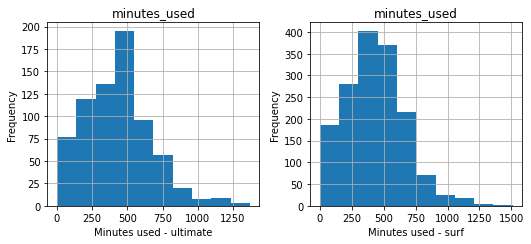

In [265]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

fig, axes = plt.subplots(1, 2)
axes[0].set_xlabel("Minutes used - ultimate")
axes[0].set_ylabel("Frequency")


axes[1].set_xlabel("Minutes used - surf")
axes[1].set_ylabel("Frequency")
user_ultimate_df.hist('minutes_used', ax=axes[0])
user_surf_df.hist('minutes_used', ax=axes[1])
plt.show()

The average 'minutes used ' by ultimate plan user are around 400-550 whereas it is slightly lesser around 300-400 for surf plan members.  
Both the histograms shows slight rightly skewed signs.
Also surf users shows more users around mean which makes it better choice .

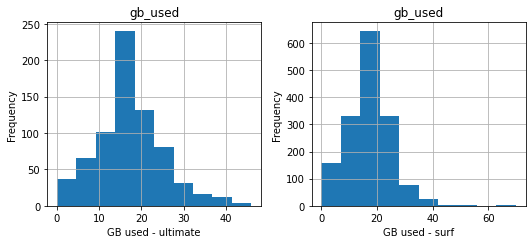

In [266]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

fig, axes = plt.subplots(1, 2)
axes[0].set_xlabel("GB used - ultimate")
axes[0].set_ylabel("Frequency")
axes[0].set_title("GB used by 'ultimate' plan users monthly")

axes[1].set_xlabel("GB used - surf")
axes[1].set_ylabel("Frequency")
axes[1].set_title("GB used by 'surf' plan users monthly")
user_ultimate_df.hist('gb_used', ax=axes[0])
user_surf_df.hist('gb_used', ax=axes[1])

plt.show()

'gb used' by ultimate customers show an average of 15-18gb .Also it is skewed to the right.With the surf users,  
there are some outliers around 60gb .Since the outlier proportion is lesser ,it doesn't have a significant impact.

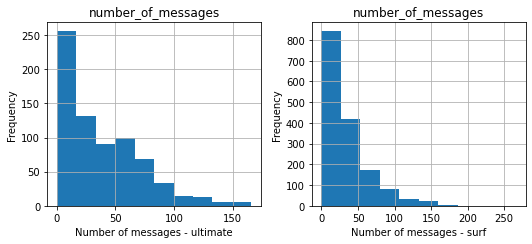

In [267]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

fig, axes = plt.subplots(1, 2)
axes[0].set_xlabel("Number of messages - ultimate")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Number of messages by 'ultimate' plan users monthly")

axes[1].set_xlabel("Number of messages - surf")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Number of messages by 'surf' plan users monthly")
user_ultimate_df.hist('number_of_messages', ax=axes[0])
user_surf_df.hist('number_of_messages', ax=axes[1])

plt.show()

Both the plan users shows similar trend with respect to the 'message' feature.The average message sent monthly  
is way less than 100 and is most  likely around less than 20 messages .This feature doesn't show any significant  
impact on either plan.

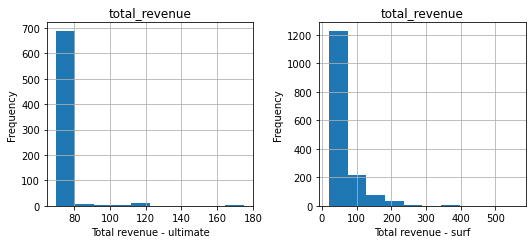

In [268]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

fig, axes = plt.subplots(1, 2)
axes[0].set_xlabel("Total revenue - ultimate")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Total revenue by 'ultimate' plan users monthly")

axes[1].set_xlabel("Total revenue - surf")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Total revenue by 'surf' plan users monthly")
user_ultimate_df.hist('total_revenue', ax=axes[0])
user_surf_df.hist('total_revenue', ax=axes[1])

plt.show()

Looking in detail of 0-50 range in x axis by defining the xlim for 'total_revenue' histograms

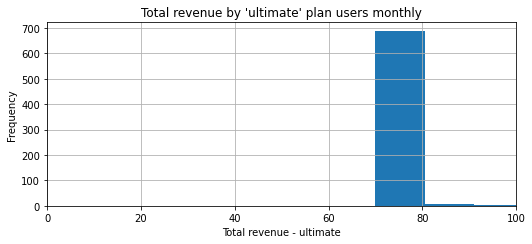

In [269]:
plt.xlabel("Total revenue - ultimate")
plt.ylabel("Frequency")
plt.title("Total revenue by 'ultimate' plan users monthly")
plt.xlim(0,100)
user_ultimate_df['total_revenue'].hist()
plt.show()


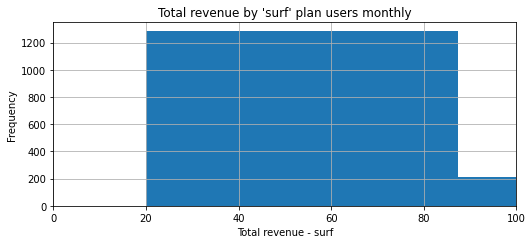

In [270]:
plt.xlabel("Total revenue - surf")
plt.ylabel("Frequency")
plt.title("Total revenue by 'surf' plan users monthly")
plt.xlim(0,100)
user_surf_df['total_revenue'].hist(bins=8)
plt.show()

We see more revenue with 'surf' plan but also has some inconsistency(deviation) in revenue generated with surf users  compared to the ultimate users.Outliers looks more in ultimate plan.


**Distribution of data**  
All the discussed features (minutes used,gb used,messages,total revenue) shows  
ultimate plan has more data skewed to the right.In general its data are more dispersed towards the right .  
Though surf plan users show similar trends , they are comparitively less skewed .

**Conclusion from histogram**  
So far with the analysis of customer behavior with respect to each parameter using histogram ,we could see that  
surf plan has more potential to generate better revenue with customers by catering closer to their preference.

In [271]:
(user_final_df.groupby('plan').agg({
    'minutes_used': ('mean','var','std'),
    'gb_used' : ('mean','var','std'),
    'number_of_messages' : ('mean','var','std'),
    'total_revenue' : ('mean','var','std')})
).style.format('{:.2f}')

Comparing these data individually with the code shows clearly both the plan shows similar trends with  
surf plan having more standard deviation for total revenue .will continue with our analysis to see if other   
testing might provide more insight about this.

**Creating dataset with used id and total revenue individually for each plan.**

In [272]:
#dataset with revenue for 'ultimate' users.
user_ultimate_pivot=user_ultimate_df.pivot_table(index=['user_id'],values='total_revenue',aggfunc='sum')

In [273]:
user_ultimate_pivot=user_ultimate_pivot.reset_index()

In [274]:
user_ultimate_pivot.head(10)

,user_id,total_revenue
0,1000,70
1,1006,147
2,1008,210
3,1011,490
4,1013,70
...,...,...
152,1482,210
153,1487,70
154,1490,658
155,1493,350


In [275]:
#dataset with revenue for 'surf' users
user_surf_pivot=user_surf_df.pivot_table(index=['user_id'],values='total_revenue',aggfunc='sum')

In [276]:
user_surf_pivot=user_surf_pivot.reset_index()

In [277]:
user_surf_pivot.head(10)

,user_id,total_revenue
0,1001,220
1,1002,90
2,1003,130
3,1004,550
4,1005,30
...,...,...
328,1494,150
329,1495,430
330,1496,120
331,1498,750


In [278]:
user_ultimate_pivot.describe()

,user_id,total_revenue
count,157.000000,157.000000
mean,1256.573248,329.802548
std,150.734705,221.235906
min,1000.000000,70.000000
25%,1126.000000,140.000000
50%,1250.000000,280.000000
75%,1395.000000,490.000000
max,1497.000000,1246.000000


In [279]:
user_surf_pivot.describe()

,user_id,total_revenue
count,333.000000,333.000000
mean,1245.306306,249.699700
std,141.644481,263.051887
min,1001.000000,20.000000
25%,1122.000000,70.000000
50%,1244.000000,170.000000
75%,1360.000000,300.000000
max,1499.000000,1720.000000


Comparing the data statistically , we see the revenue from the plans are different with 'surf' having comparitively more income.

   # Null hypothesis1:
     The average revenue from users of Ultimate and Surf calling plans are equal.
    

# Alternate hypothesis1:
    The average revenue from users of Ultimate and Surf calling plans differs.
   

In order to test our hypothesis that the means of the two statistical populations are equal based on samples taken from them,we apply the method scipy.stats.ttest_ind(array1, array2, equal_var)

In [280]:
alpha = 0.05  # critical statistical significance level
# if the p-value is less than alpha, we reject the hypothesis

#we take sample from user_surf_pivot(surf revenue) and user_ultimate_pivot(ultimate plan revenue)
results = st.ttest_ind(user_surf_pivot['total_revenue'], user_ultimate_pivot['total_revenue'])

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

p-value:  0.0010240415268913947
We reject the null hypothesis


**Hypothesis testing conclusion for null hypothesis 1:**  
Based on our hypothesis testing , we see that as the p-value is way less than alpha , our null hypothesis is rejected .This means ultimate and surf plan revenues differ from each other.
This is in agreement with what we have derived from the statistical data and the calculation of total_revenue  
based on each plan from the two datasets('user_surf_df' and 'user_ultimate_df').


 # Null Hypothesis 2:
 The average revenue from users in NY-NJ area is same as that of the users from other regions.

# Alternate Hypothesis2:
     The average revenue from users in NY-NJ area is different from that of the users from other regions.

In [281]:
users_df.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,plan_in_use
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,na,True
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,na,True
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,na,True
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,na,True
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,na,True
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,na,True
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,False
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,na,True
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,na,True
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,na,True


In [282]:
#getting a new dataframe with ny-nj users
users_ny_nj=users_df[users_df['city'].str.contains('NY-NJ')]

In [283]:
users_ny_nj.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,plan_in_use
14,1014,Edmundo,Simon,61,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-25,surf,na,True
22,1022,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07,False
24,1024,Yuki,Tyson,74,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-08-21,surf,na,True
27,1027,Georgeanna,Cardenas,38,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-26,surf,na,True
31,1031,Lane,Martin,52,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-07-15,ultimate,na,True
34,1034,Jc,Gentry,22,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-08-13,surf,na,True
43,1043,Carlos,Hinton,42,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-20,ultimate,na,True
45,1045,Barney,Ortega,20,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-10-15,surf,na,True
49,1049,Loise,Avery,25,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-21,surf,na,True
53,1053,Piper,Espinoza,27,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-07-30,surf,na,True


In [284]:
#new dataset for users from other than 'ny-nj'
users_others=users_df[users_df['city'].str.contains('NY-NJ')==False]

In [285]:
users_others.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,plan_in_use
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,na,True
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,na,True
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,na,True
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,na,True
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,na,True
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,na,True
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,False
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,na,True
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,na,True
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,na,True


Create a dataset with extra charges for ny-nj users of both 'surf' and 'ultimate' plans

In [286]:
users_ny_nj=users_ny_nj[['user_id','city']]

In [287]:
users_ny_nj.head(10)

,user_id,city
14,1014,"New York-Newark-Jersey City, NY-NJ-PA MSA"
22,1022,"New York-Newark-Jersey City, NY-NJ-PA MSA"
24,1024,"New York-Newark-Jersey City, NY-NJ-PA MSA"
27,1027,"New York-Newark-Jersey City, NY-NJ-PA MSA"
31,1031,"New York-Newark-Jersey City, NY-NJ-PA MSA"
34,1034,"New York-Newark-Jersey City, NY-NJ-PA MSA"
43,1043,"New York-Newark-Jersey City, NY-NJ-PA MSA"
45,1045,"New York-Newark-Jersey City, NY-NJ-PA MSA"
49,1049,"New York-Newark-Jersey City, NY-NJ-PA MSA"
53,1053,"New York-Newark-Jersey City, NY-NJ-PA MSA"


Create a dataset with extra charges for non 'ny-nj' users of both 'surf' and 'ultimate' plans

In [288]:
users_others=users_others[['user_id','city']]

In [289]:
users_others.head(10)

,user_id,city
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,"Seattle-Tacoma-Bellevue, WA MSA"
2,1002,"Las Vegas-Henderson-Paradise, NV MSA"
3,1003,"Tulsa, OK MSA"
4,1004,"Seattle-Tacoma-Bellevue, WA MSA"
5,1005,"Dallas-Fort Worth-Arlington, TX MSA"
6,1006,"San Francisco-Oakland-Berkeley, CA MSA"
7,1007,"Grand Rapids-Kentwood, MI MSA"
8,1008,"Orlando-Kissimmee-Sanford, FL MSA"
9,1009,"San Jose-Sunnyvale-Santa Clara, CA MSA"


In [290]:
users_ny_nj_surf=users_ny_nj.merge(user_surf_pivot,on='user_id',how='inner')

In [291]:
users_ny_nj_surf.head(10)

,user_id,city,total_revenue
0,1014,"New York-Newark-Jersey City, NY-NJ-PA MSA",40
1,1022,"New York-Newark-Jersey City, NY-NJ-PA MSA",390
2,1024,"New York-Newark-Jersey City, NY-NJ-PA MSA",20
3,1027,"New York-Newark-Jersey City, NY-NJ-PA MSA",170
4,1034,"New York-Newark-Jersey City, NY-NJ-PA MSA",20
5,1045,"New York-Newark-Jersey City, NY-NJ-PA MSA",160
6,1049,"New York-Newark-Jersey City, NY-NJ-PA MSA",180
7,1053,"New York-Newark-Jersey City, NY-NJ-PA MSA",280
8,1064,"New York-Newark-Jersey City, NY-NJ-PA MSA",250
9,1068,"New York-Newark-Jersey City, NY-NJ-PA MSA",210


In [292]:
users_ny_nj_ultimate=users_ny_nj.merge(user_ultimate_pivot,on='user_id',how='inner')

In [293]:
users_ny_nj_ultimate.head(10)

,user_id,city,total_revenue
0,1031,"New York-Newark-Jersey City, NY-NJ-PA MSA",420
1,1043,"New York-Newark-Jersey City, NY-NJ-PA MSA",560
2,1063,"New York-Newark-Jersey City, NY-NJ-PA MSA",140
3,1086,"New York-Newark-Jersey City, NY-NJ-PA MSA",70
4,1096,"New York-Newark-Jersey City, NY-NJ-PA MSA",70
5,1107,"New York-Newark-Jersey City, NY-NJ-PA MSA",140
6,1113,"New York-Newark-Jersey City, NY-NJ-PA MSA",490
7,1144,"New York-Newark-Jersey City, NY-NJ-PA MSA",819
8,1161,"New York-Newark-Jersey City, NY-NJ-PA MSA",140
9,1211,"New York-Newark-Jersey City, NY-NJ-PA MSA",420


In [294]:
#appending surf and ultimate users for ny-nj 
users_ny_nj_charges=users_ny_nj_surf.append(users_ny_nj_ultimate,ignore_index=True)

In [295]:
users_ny_nj_charges.head(10)

,user_id,city,total_revenue
0,1014,"New York-Newark-Jersey City, NY-NJ-PA MSA",40
1,1022,"New York-Newark-Jersey City, NY-NJ-PA MSA",390
2,1024,"New York-Newark-Jersey City, NY-NJ-PA MSA",20
3,1027,"New York-Newark-Jersey City, NY-NJ-PA MSA",170
4,1034,"New York-Newark-Jersey City, NY-NJ-PA MSA",20
5,1045,"New York-Newark-Jersey City, NY-NJ-PA MSA",160
6,1049,"New York-Newark-Jersey City, NY-NJ-PA MSA",180
7,1053,"New York-Newark-Jersey City, NY-NJ-PA MSA",280
8,1064,"New York-Newark-Jersey City, NY-NJ-PA MSA",250
9,1068,"New York-Newark-Jersey City, NY-NJ-PA MSA",210


In [296]:
users_others_surf=users_others.merge(user_surf_pivot,on='user_id',how='inner')

In [297]:
users_others_surf.head(10)

,user_id,city,total_revenue
0,1001,"Seattle-Tacoma-Bellevue, WA MSA",220
1,1002,"Las Vegas-Henderson-Paradise, NV MSA",90
2,1003,"Tulsa, OK MSA",130
3,1004,"Seattle-Tacoma-Bellevue, WA MSA",550
4,1005,"Dallas-Fort Worth-Arlington, TX MSA",30
5,1007,"Grand Rapids-Kentwood, MI MSA",720
6,1009,"San Jose-Sunnyvale-Santa Clara, CA MSA",740
7,1010,"Dallas-Fort Worth-Arlington, TX MSA",290
8,1012,"Chicago-Naperville-Elgin, IL-IN-WI MSA",40
9,1015,"Pittsburgh, PA MSA",40


In [298]:
users_others_ultimate=users_others.merge(user_ultimate_pivot,on='user_id',how='inner')

In [299]:
users_others_ultimate.head(10)

,user_id,city,total_revenue
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",70
1,1006,"San Francisco-Oakland-Berkeley, CA MSA",147
2,1008,"Orlando-Kissimmee-Sanford, FL MSA",210
3,1011,"Cleveland-Elyria, OH MSA",490
4,1013,"Knoxville, TN MSA",70
5,1026,"Houston-The Woodlands-Sugar Land, TX MSA",140
6,1028,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",1246
7,1030,"Chicago-Naperville-Elgin, IL-IN-WI MSA",210
8,1032,"Birmingham-Hoover, AL MSA",140
9,1033,"Oklahoma City, OK MSA",280


In [300]:
#appending surf and ultimate users for other than 'ny-nj ''
users_others_charges=users_others_surf.append(users_others_ultimate,ignore_index=True)

In [301]:
users_others_charges.head(10)

,user_id,city,total_revenue
0,1001,"Seattle-Tacoma-Bellevue, WA MSA",220
1,1002,"Las Vegas-Henderson-Paradise, NV MSA",90
2,1003,"Tulsa, OK MSA",130
3,1004,"Seattle-Tacoma-Bellevue, WA MSA",550
4,1005,"Dallas-Fort Worth-Arlington, TX MSA",30
5,1007,"Grand Rapids-Kentwood, MI MSA",720
6,1009,"San Jose-Sunnyvale-Santa Clara, CA MSA",740
7,1010,"Dallas-Fort Worth-Arlington, TX MSA",290
8,1012,"Chicago-Naperville-Elgin, IL-IN-WI MSA",40
9,1015,"Pittsburgh, PA MSA",40


Hypothesis testing using samples from 'users_others_charges'(other than ny-nj) and 'users_ny_nj_charges'(ny-nj)

In [302]:
alpha = 0.05  # critical statistical significance level
# if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(users_others_charges['total_revenue'], users_ny_nj_charges['total_revenue'])

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

p-value:  0.4478656745243377
We can't reject the null hypothesis


**Hypothesis testing conclusion for null hypothesis 1:**  
Based on our hypothesis testing , we see that as the p-value is larger than alpha indicating that we can't reject the null hypothesis.  
So , the revenue from NY-NJ region is closer to revenues of other region.

In [303]:
users_others_charges.describe()

,user_id,total_revenue
count,411.000000,411.000000
mean,1253.437956,279.172749
std,144.194509,258.814722
min,1000.000000,20.000000
25%,1131.500000,90.000000
50%,1255.000000,210.000000
75%,1375.500000,395.000000
max,1499.000000,1720.000000


In [304]:
users_others_charges['total_revenue'].sum()

114740

In [305]:
users_ny_nj_charges['total_revenue'].sum()

20189

In [306]:
users_ny_nj_charges.describe()

,user_id,total_revenue
count,79.000000,79.000000
mean,1225.392405,255.556962
std,145.095850,220.501221
min,1014.000000,20.000000
25%,1103.000000,75.000000
50%,1198.000000,200.000000
75%,1356.000000,305.000000
max,1498.000000,950.000000


# Conclusion  
1.**Revenue Generator for Megaline**  
surf plan is the major revenue generator for Megaline which is  around 68330.  
The users in this plan use more calling minutes and gb compared to ultimate users.  
The total number of users subscribed to surf plan(333) is almost double that of ultimate  
plan users(157).Interestingly the total revenue generated from surf users are  
way more than that of ultimate users.
Messages are significantly lower in numbers and we don't see any extras used in either plan .   
2.There is no much difference in revenues from 'NY-NJ' and other regions.